## Data Dictionary

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel(r'C:\\Users\\delll\\Desktop\\Python\\DataSets\\EastWestAirlines.xlsx')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df.info()
#All columns have int datatype with 3999 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.isnull().sum()
#There are no null values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


## Univariate Analysis

### histogram 

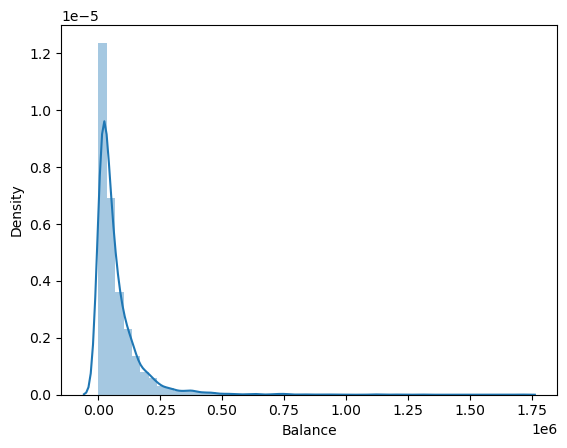

Skewness: 5.004187034431081
Kurtosis: 44.15793164623947


In [9]:
#Histogram for Balance
sns.distplot(df['Balance'])
plt.show()
print("Skewness:",df['Balance'].skew())
print('Kurtosis:',df['Balance'].kurtosis())
#data is right skewwed with skewness 5.004 and kurtosis is 44.15

In [11]:
#make this curve normally distributed
df['Balance']=np.log(df['Balance'])
print ('Skewness is', df['Balance'].skew())
#sns.distplot(df['Balance'])
plt.show()

Skewness is -1.388128758129887


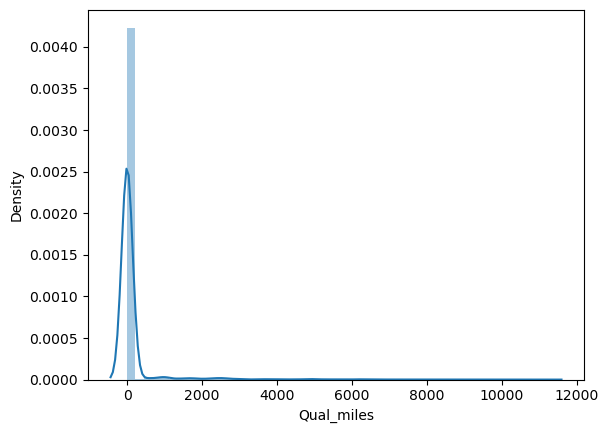

7.512395072097138
67.68935141908345


In [12]:
sns.distplot(df['Qual_miles'])
plt.show()
print(df['Qual_miles'].skew())
print(df['Qual_miles'].kurtosis())
#data is right skewwed with skewness 7.51 and kurtosis is 67.68

Skewness is nan


ValueError: cannot convert float NaN to integer

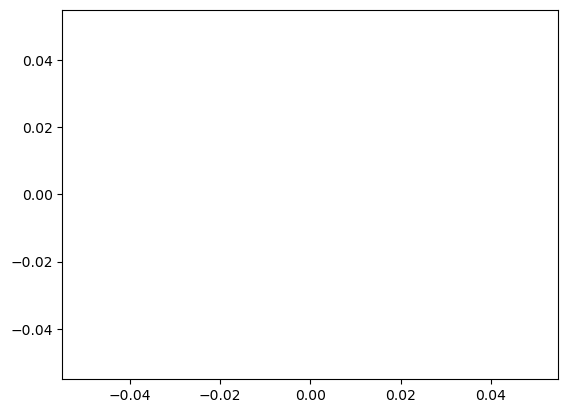

In [13]:
df['Qual_miles']=np.log(df['Qual_miles'])
print ('Skewness is', df['Qual_miles'].skew())
sns.distplot(df['Qual_miles'])
plt.show()

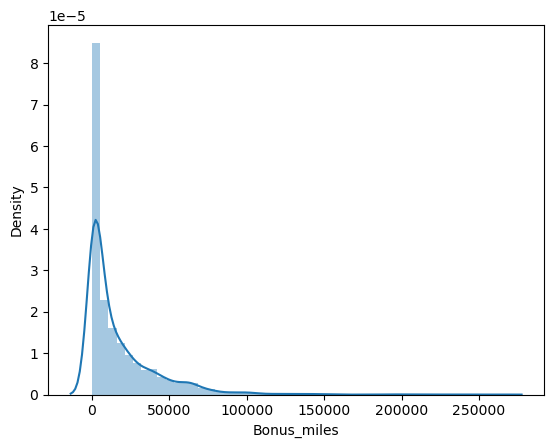

2.8420933668869197
13.630489238331991


In [13]:
sns.distplot(df['Bonus_miles'])
plt.show()
print(df['Bonus_miles'].skew())
print(df['Bonus_miles'].kurtosis())
#data is right skewwed with skewness 2.84 and kurtosis is 13.63


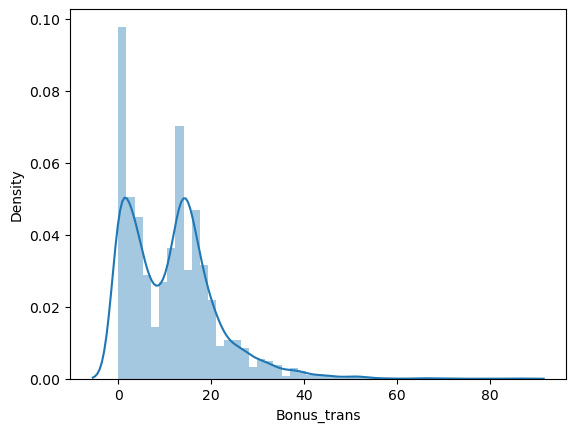

1.1573624831608498
2.7457371278773044


In [14]:
sns.distplot(df['Bonus_trans'])
plt.show()
print(df['Bonus_trans'].skew())
print(df['Bonus_trans'].kurtosis())
#data is right skewwed with skewness 1.15 and kurtosis is 2.74

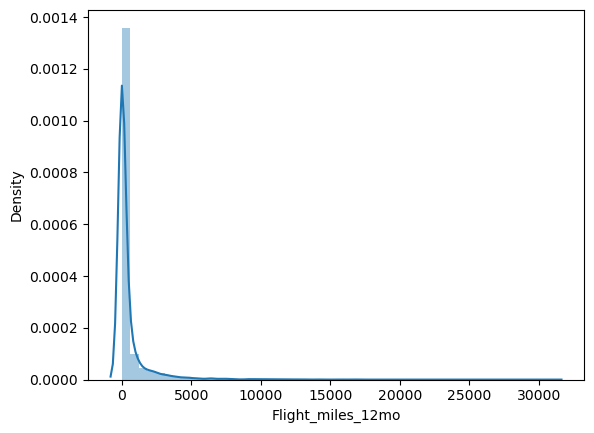

7.451666167619329
94.76101871527655


In [15]:
sns.distplot(df['Flight_miles_12mo'])
plt.show()
print(df['Flight_miles_12mo'].skew())
print(df['Flight_miles_12mo'].kurtosis())
#data is right skewwed with skewness 7.45 and kurtosis is 94.76


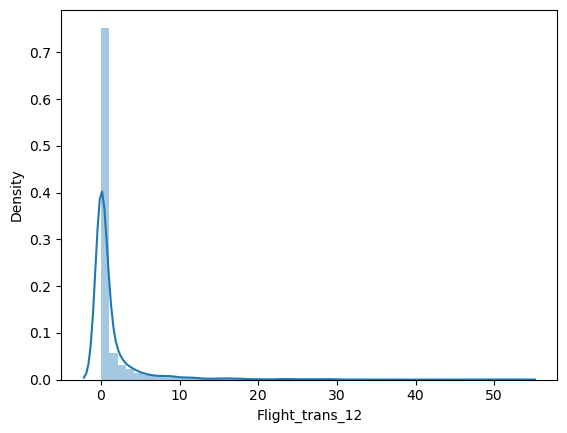

5.490461246535664
42.978152375989566


In [16]:
sns.distplot(df['Flight_trans_12'])
plt.show()
print(df['Flight_trans_12'].skew())
print(df['Flight_trans_12'].kurtosis())
#data is right skewwed with skewness 5.49 and kurtosis is 42.97


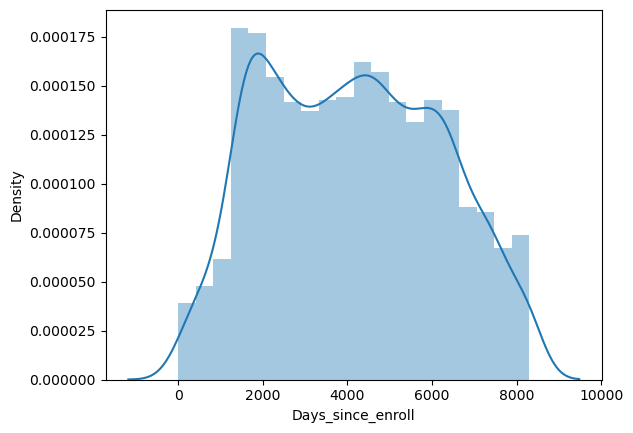

0.12017356507902774
-0.9675053776216838


In [17]:
sns.distplot(df['Days_since_enroll'])
plt.show()
print(df['Days_since_enroll'].skew())
print(df['Days_since_enroll'].kurtosis())
#data is normally distributed with skewness 0.12 and kurtosis is -0.96


### Boxplot

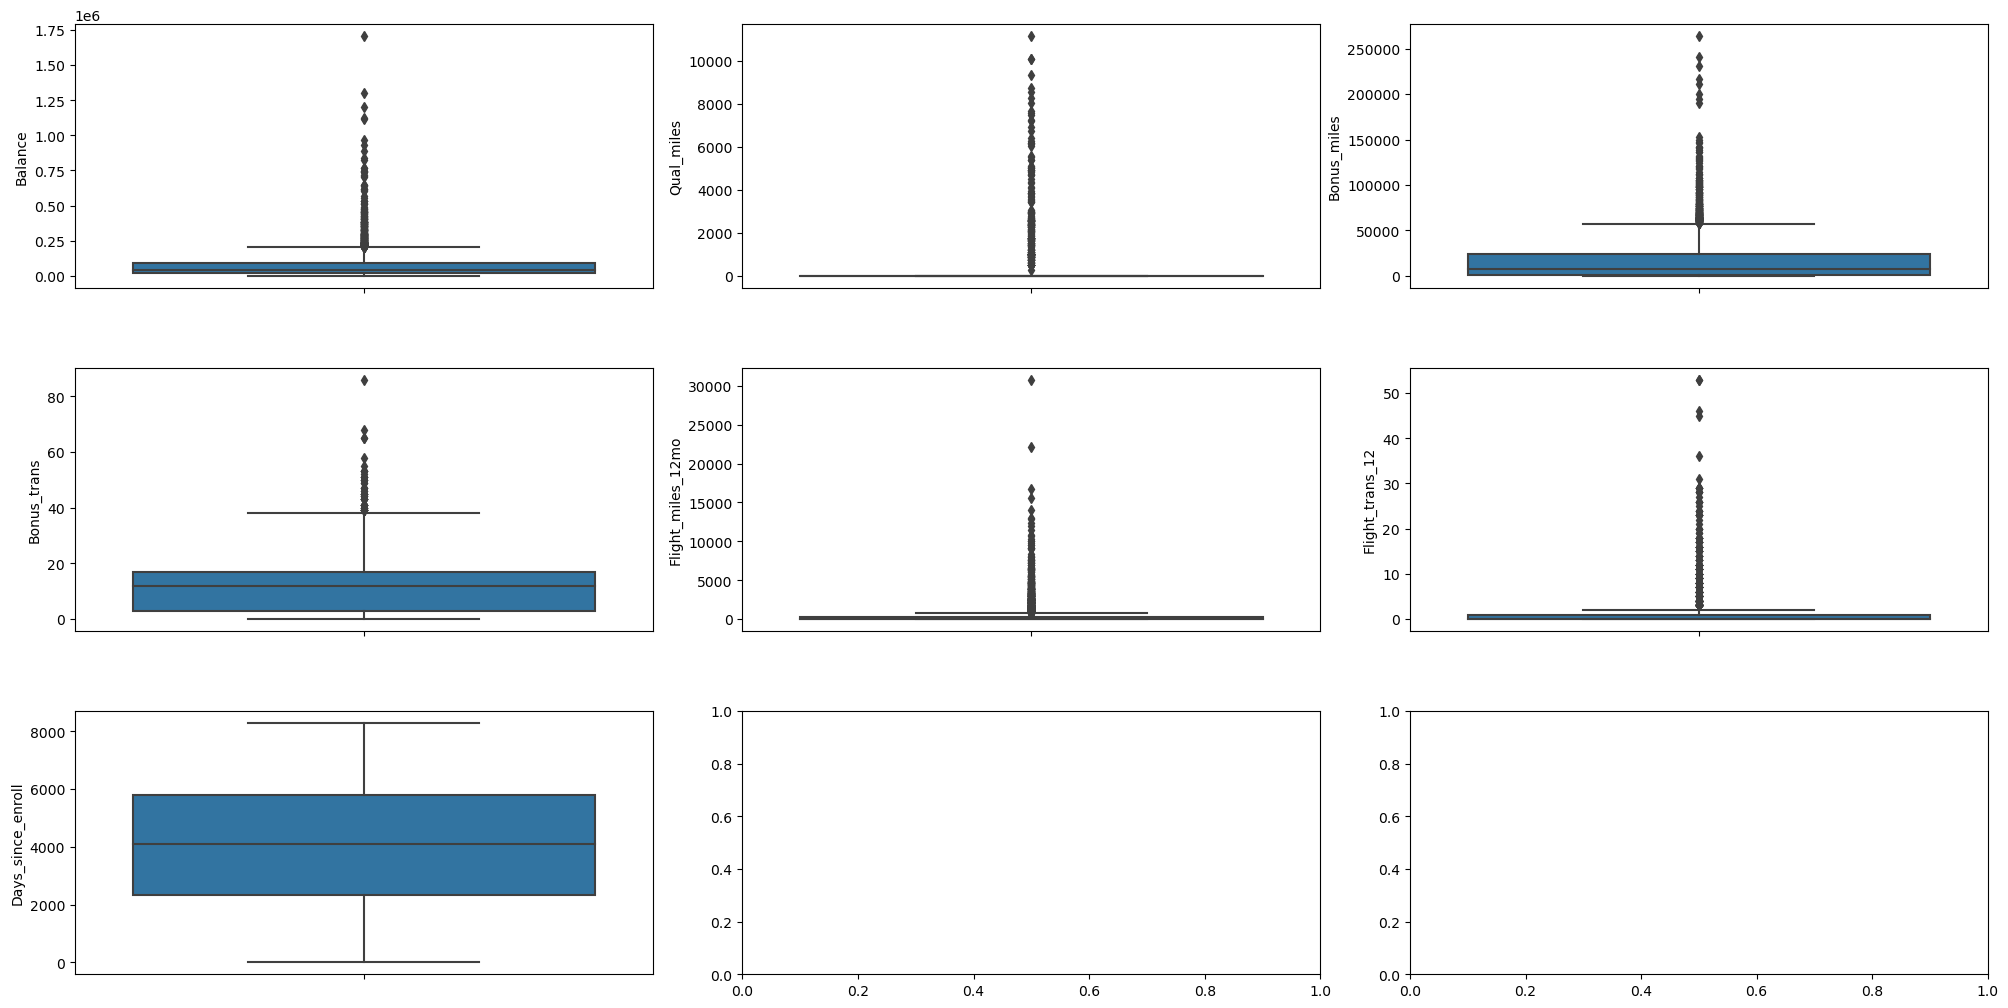

In [26]:
df1=df[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]
fig, axs = plt.subplots(ncols=3, nrows=3 ,figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#from Balance col to Flight_trans_12 col outliers are present
#Days_since_enroll no outlier is present

In [27]:
# Qual_miles,Flight_miles_12mo and Flight_trans_12 have lot of outliers. so drop this columns
df.drop(columns=['Qual_miles','Flight_miles_12mo','Flight_trans_12'],inplace=True)

In [28]:
df.head()

,ID#,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?
0,1,28143,1,1,1,174,1,7000,0
1,2,19244,1,1,1,215,2,6968,0
2,3,41354,1,1,1,4123,4,7034,0
3,4,14776,1,1,1,500,1,6952,0
4,5,97752,4,1,1,43300,26,6935,1


In [29]:
l=['Balance','Bonus_miles','Bonus_trans',]
winsor=Winsorizer(capping_method='iqr',
                  tail='both',
                  fold=1.5,
                  variables=l)
df[l]=winsor.fit_transform(df[l])

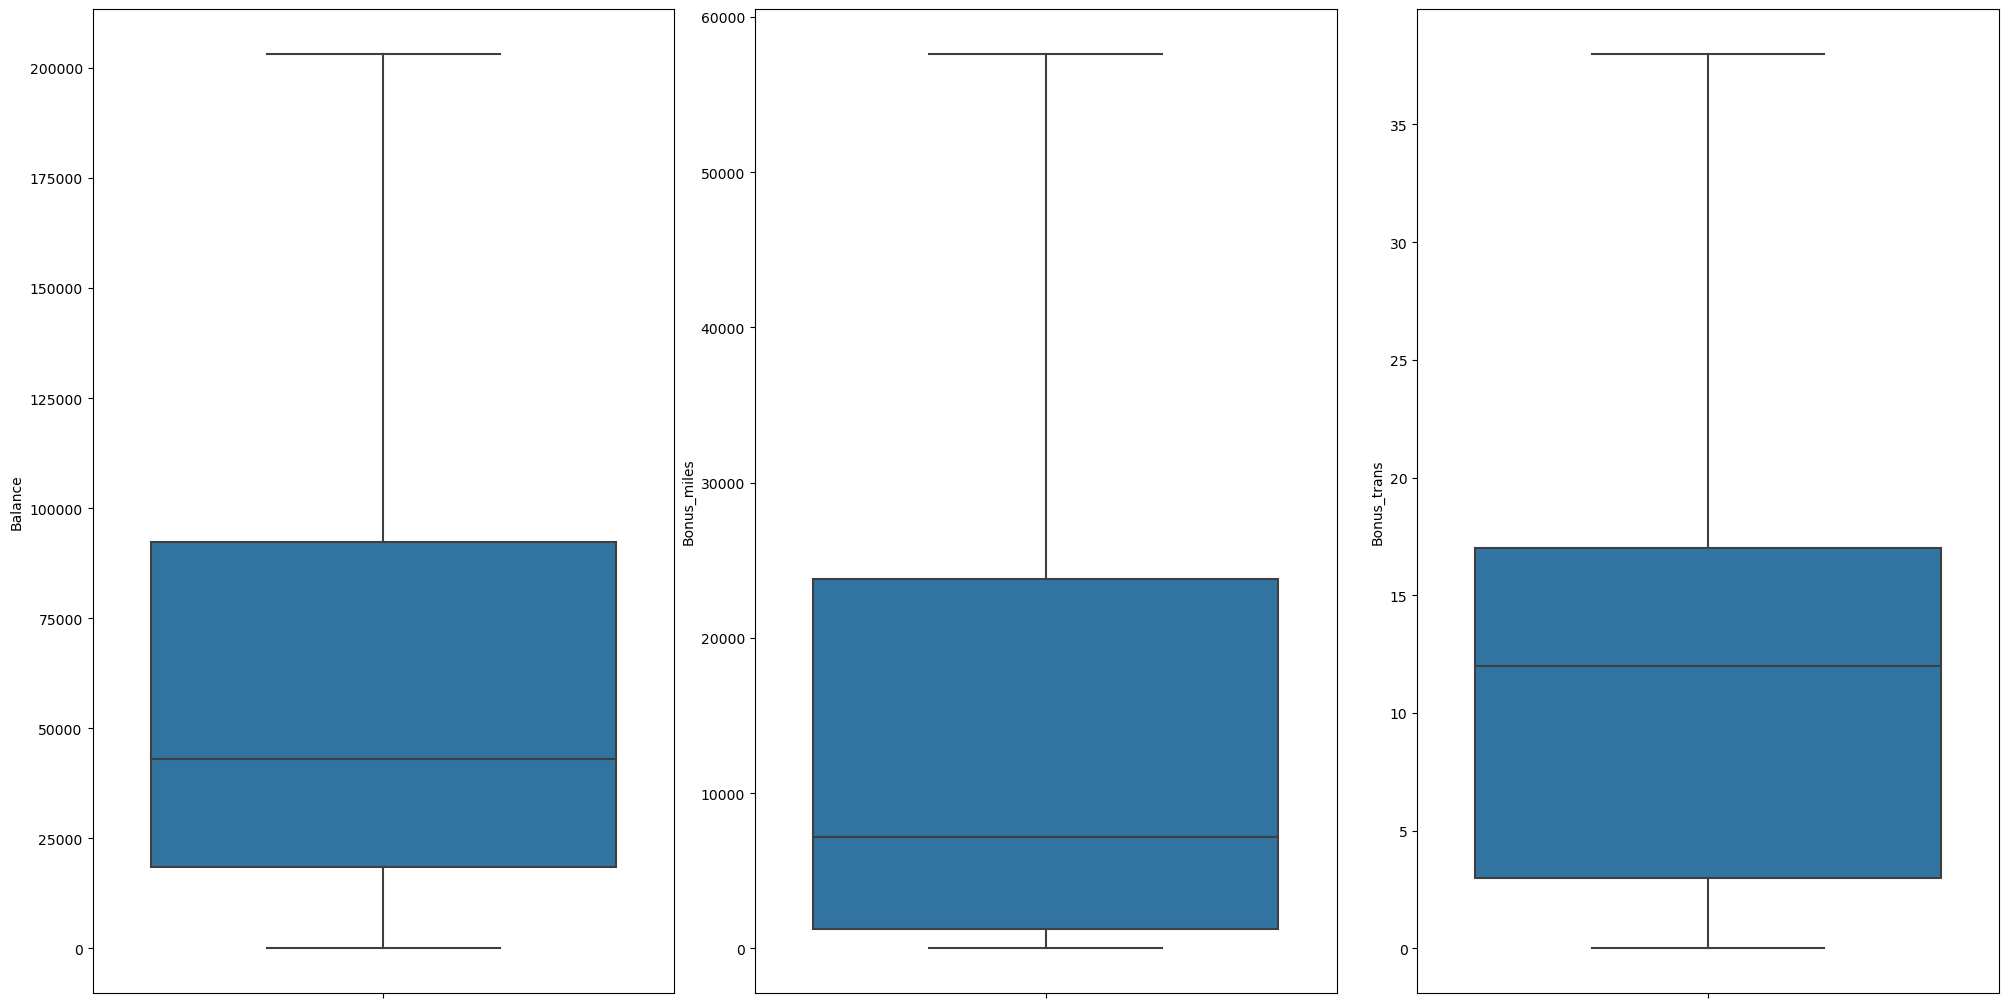

In [31]:
fig, axs = plt.subplots(ncols=3, nrows=1 ,figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df[l].items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


## Bivaraiate Analysis

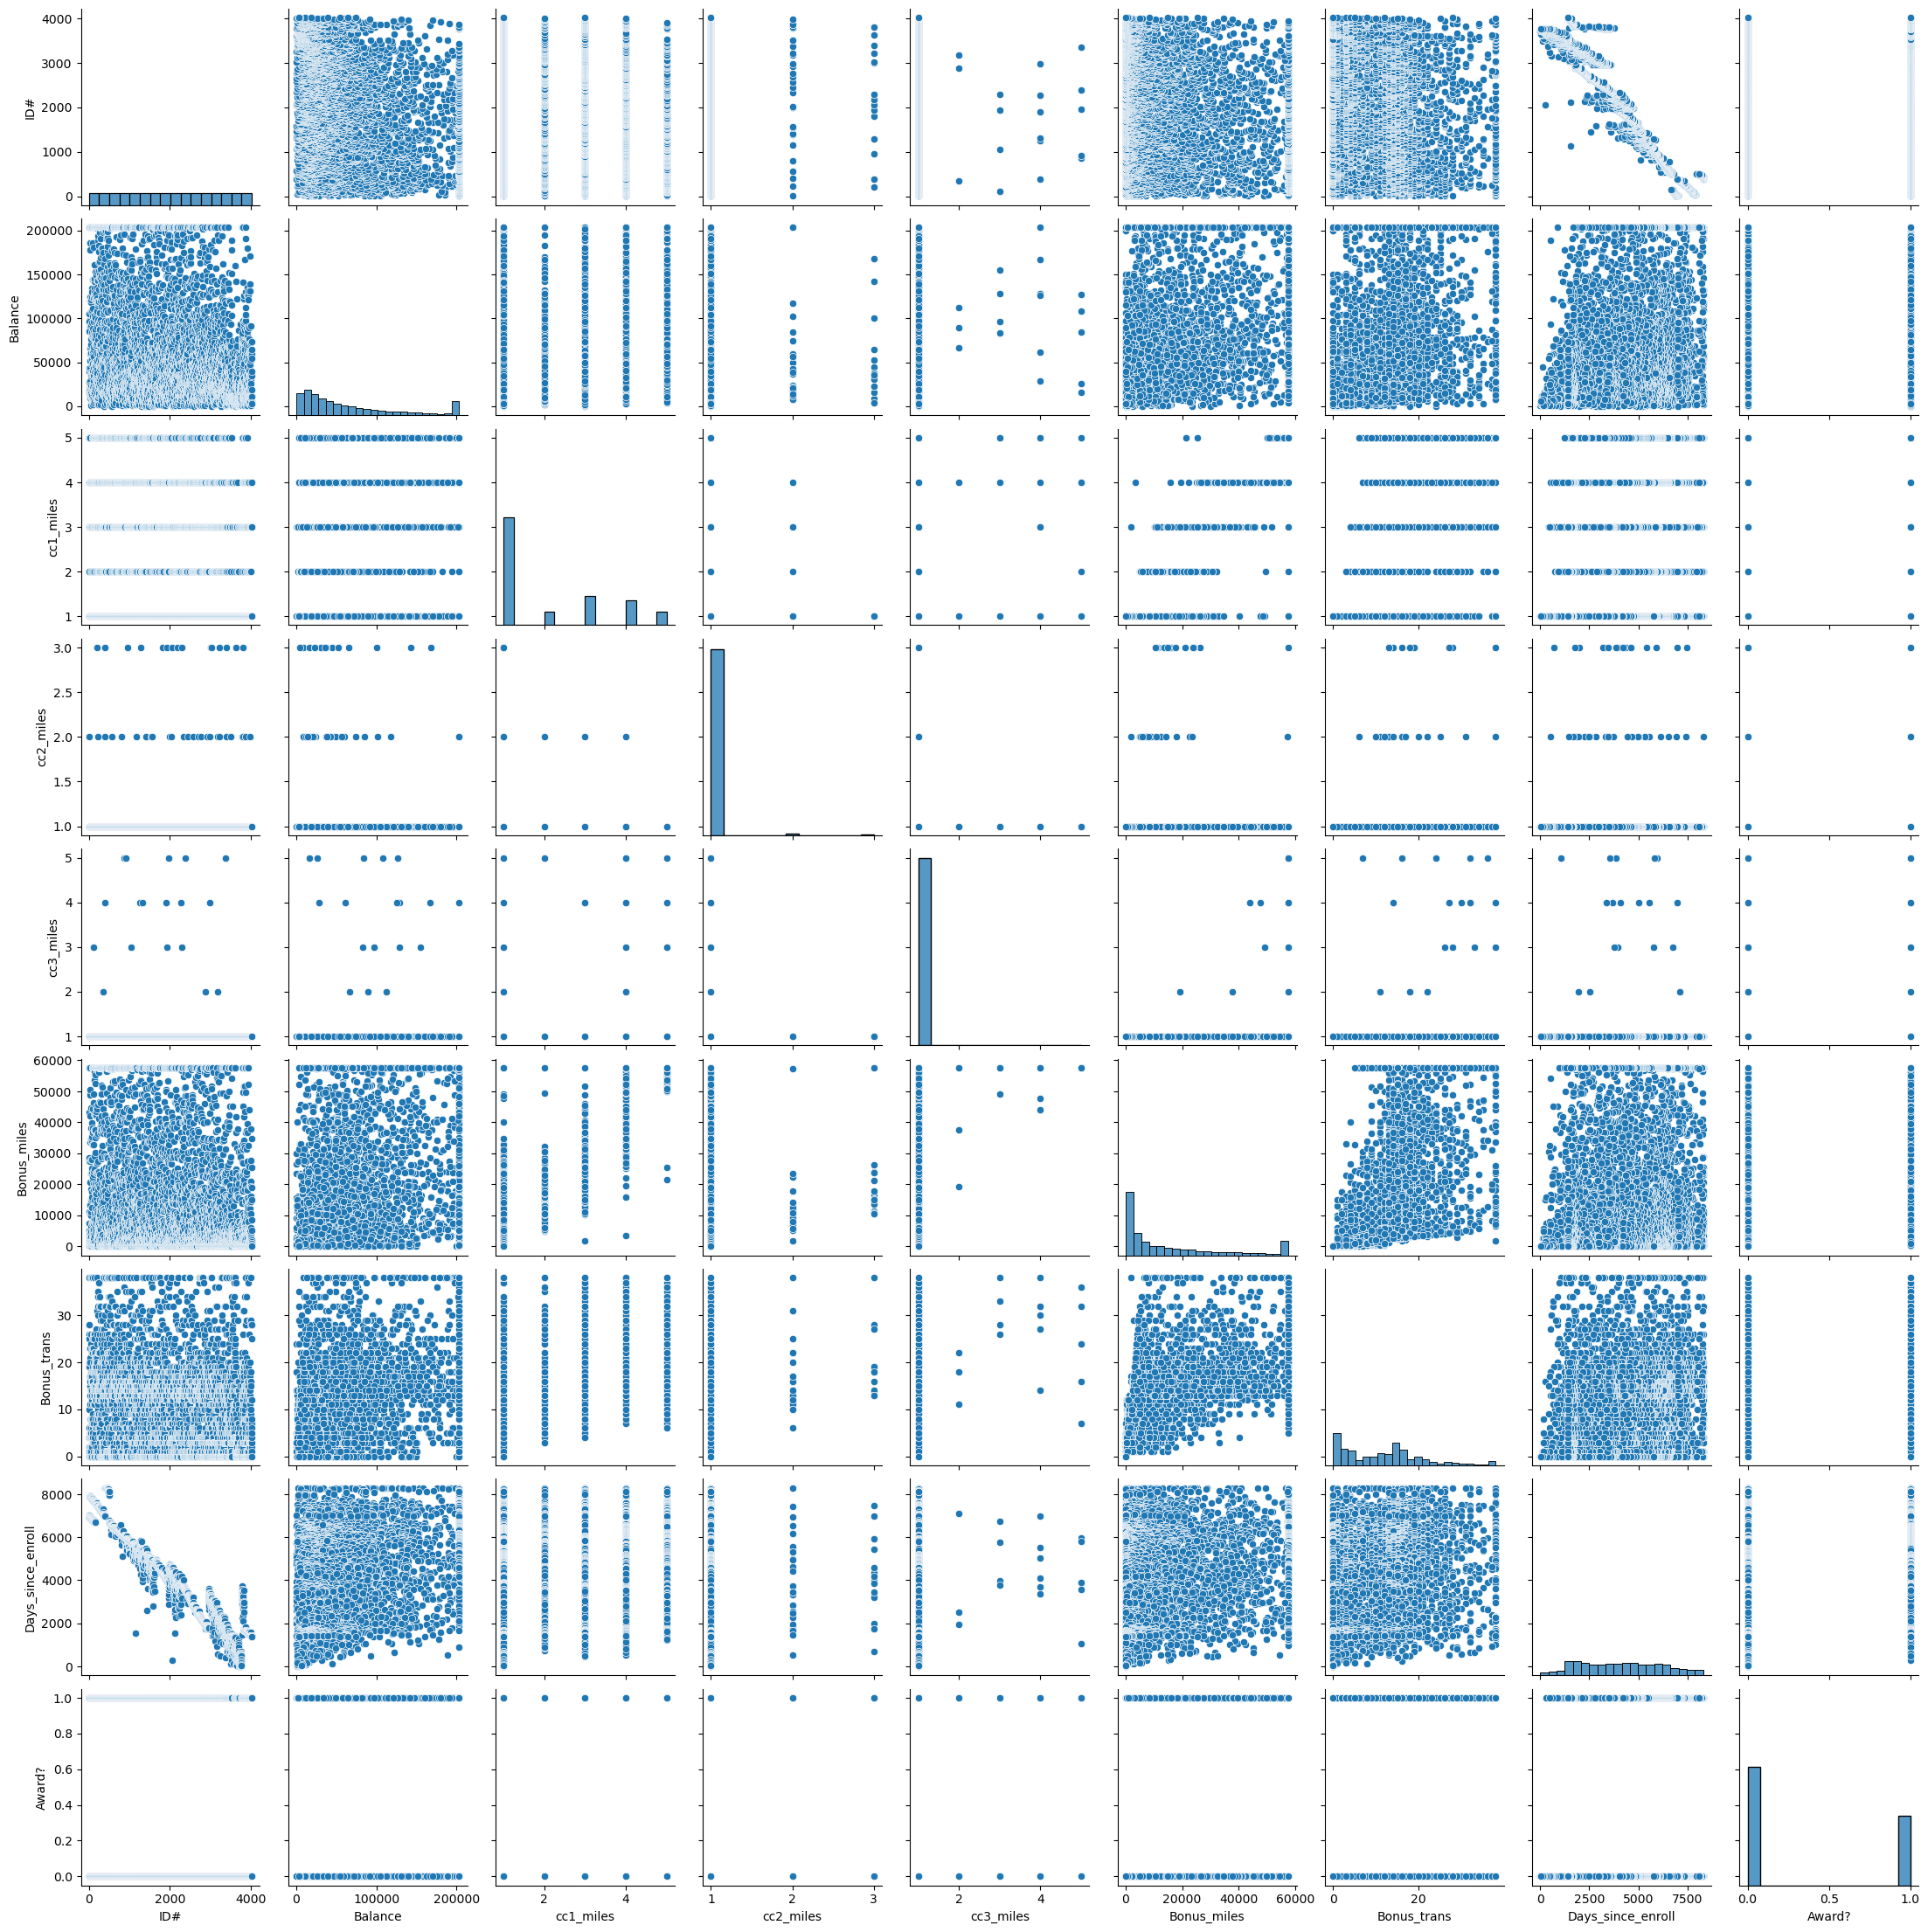

In [32]:
#Pairplot
sns.pairplot(df)
plt.show()

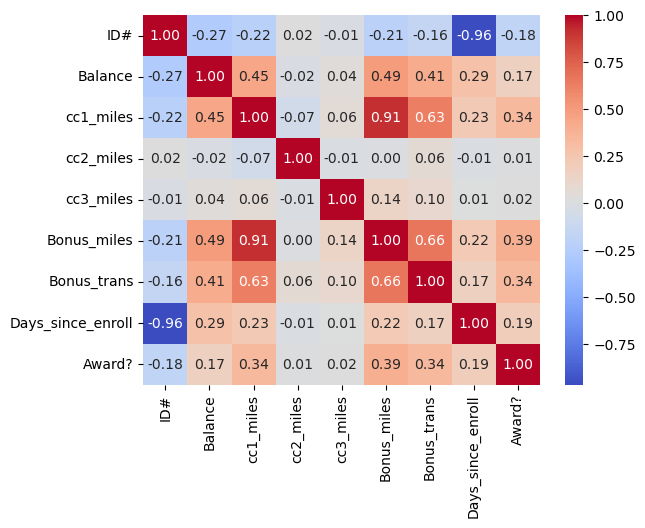

In [33]:
#Heatmap
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [34]:
df.drop('Award?',axis=1,inplace=True)

In [36]:
df.drop('ID#',axis=1,inplace=True)

In [37]:
df.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll
0,28143.0,1,1,1,174.0,1,7000
1,19244.0,1,1,1,215.0,2,6968
2,41354.0,1,1,1,4123.0,4,7034
3,14776.0,1,1,1,500.0,1,6952
4,97752.0,4,1,1,43300.0,26,6935


In [38]:
df.shape

(3999, 7)

<Axes: xlabel='cc1_miles', ylabel='Bonus_miles'>

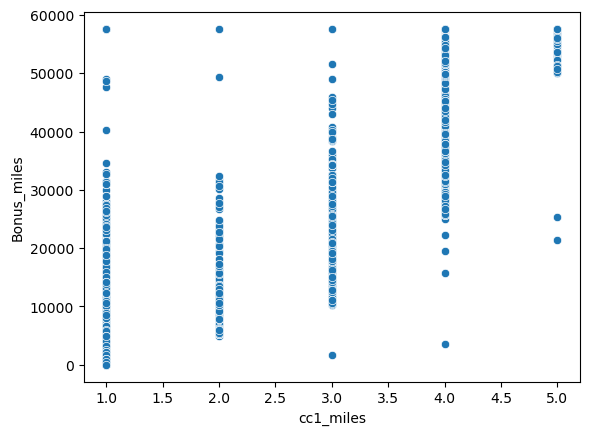

In [43]:
sns.scatterplot(x='cc1_miles',y='Bonus_miles',data=df)

<Axes: xlabel='cc1_miles', ylabel='Bonus_trans'>

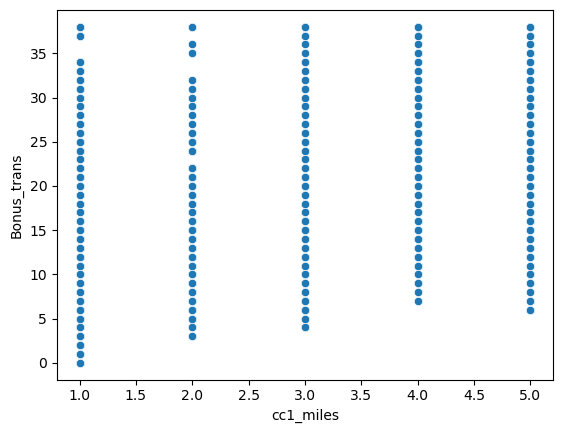

In [44]:
sns.scatterplot(x='cc1_miles',y='Bonus_trans',data=df)

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

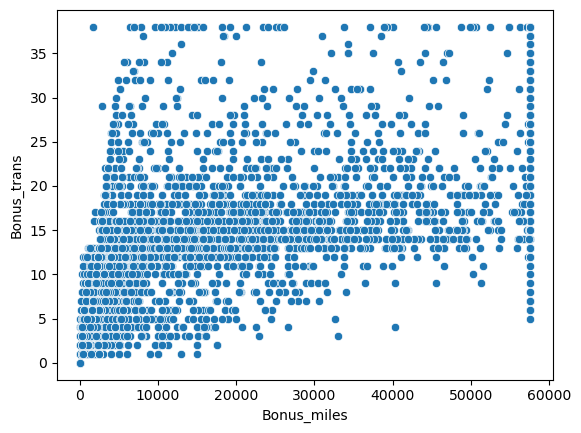

In [45]:
sns.scatterplot(x='Bonus_miles',y='Bonus_trans',data=df)

In [39]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
df_norm=norm_fun(df)
b=df_norm.describe()

In [40]:
df_norm.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll
0,0.138486,0.00,0.0,0.0,0.003019,0.026316,0.843742
1,0.094696,0.00,0.0,0.0,0.003731,0.052632,0.839884
2,0.203495,0.00,0.0,0.0,0.071547,0.105263,0.847842
3,0.072710,0.00,0.0,0.0,0.008677,0.026316,0.837955
4,0.481019,0.75,0.0,0.0,0.751394,0.684211,0.835905


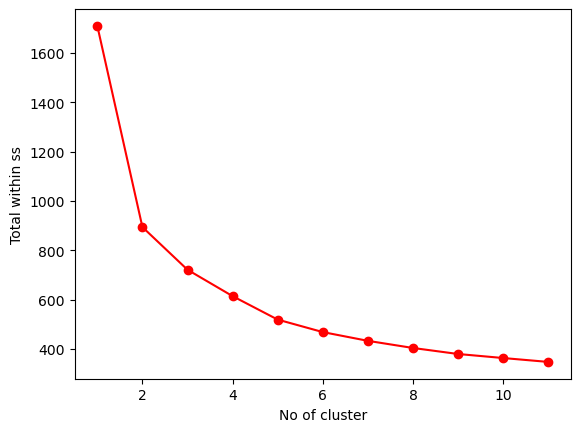

In [42]:
TWSS=[]
k=list(range(1,12))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS,'ro-')
plt.xlabel('No of cluster')
plt.ylabel('Total within ss')
plt.show()

In [46]:
Model=KMeans(n_clusters=5)
Model.fit(df_norm)
Model.labels_
             

array([0, 0, 0, ..., 1, 2, 2])

In [47]:
KCluster=pd.Series(Model.labels_)
df_norm['KCluster']=KCluster

In [48]:
df_norm.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,KCluster
0,0.138486,0.00,0.0,0.0,0.003019,0.026316,0.843742,0
1,0.094696,0.00,0.0,0.0,0.003731,0.052632,0.839884,0
2,0.203495,0.00,0.0,0.0,0.071547,0.105263,0.847842,0
3,0.072710,0.00,0.0,0.0,0.008677,0.026316,0.837955,0
4,0.481019,0.75,0.0,0.0,0.751394,0.684211,0.835905,3


In [49]:
df1=df_norm[df_norm['KCluster']==0]
df2=df_norm[df_norm['KCluster']==1]
df3=df_norm[df_norm['KCluster']==2]
df4=df_norm[df_norm['KCluster']==3]
df5=df_norm[df_norm['KCluster']==4]


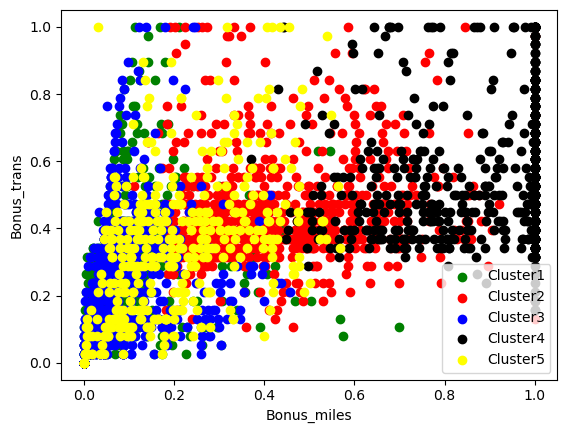

In [50]:
plt.scatter(df1['Bonus_miles'],df1['Bonus_trans'],color='green',label='Cluster1')
plt.scatter(df2['Bonus_miles'],df2['Bonus_trans'],color='red',label='Cluster2')
plt.scatter(df3['Bonus_miles'],df3['Bonus_trans'],color='blue',label='Cluster3')
plt.scatter(df4['Bonus_miles'],df4['Bonus_trans'],color='black',label='Cluster4')
plt.scatter(df5['Bonus_miles'],df5['Bonus_trans'],color='yellow',label='Cluster5')
#plt.scatter(Model.cluster_centers_[:,0],Model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Bonus_miles')
plt.ylabel('Bonus_trans')
plt.legend()
plt.show()